# PRINCIPAL COMPONENT ANALYSIS
    Standardize the d-dimensional dataset.
      Construct the covariance matrix.
      Decompose the covariance matrix into its eigenvectors and eigenvalues.
      Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
      Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ().
      Construct a projection matrix, W, from the “top” k eigenvectors.
      Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace.

Kindly Find more Explanation  in README.md



In [8]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,1:].values
Y = df_wine.iloc[:,0].values

x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state= 2, stratify= Y)

from sklearn.preprocessing import StandardScaler

SSC = StandardScaler()
x_train_std = SSC.fit_transform(x_train)
x_test_std = SSC.transform(x_test)


Eigen calculation:
Note:
The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude

You can find more information here: 
https://www.geeksforgeeks.org/engineering-mathematics/eigen-values/

In [9]:
import numpy as np
cov_mar = np.cov(x_test_std.T)
#Cov_mar is covelance matrix
eigen_val, eigen_vect = np.linalg.eig(cov_mar)

print(f"The eigen values is {eigen_val}")

# Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13×13-dimensional matrix (eigen_vecs).


The eigen values is [4.69617259 2.43379112 1.3312977  1.20534756 1.08670023 0.82307954
 0.48817524 0.33663549 0.27511355 0.10189091 0.11482066 0.18272328
 0.16290498]


Total_explained Variance
 The variance explained ratio of an eigenvalue, , is simply the fraction of an eigenvalue, , and the total sum of the eigenvalues

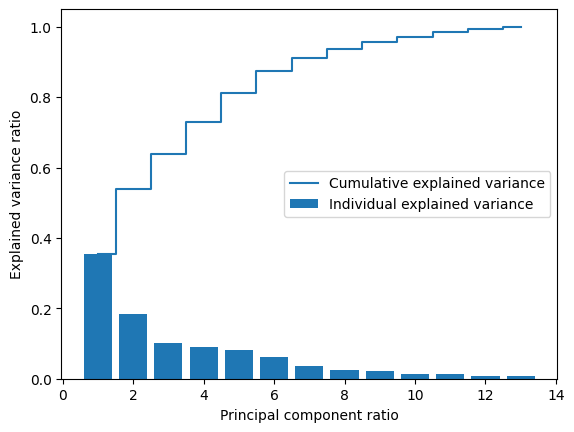

In [14]:
ror = sum(eigen_val)

var_exp = [(i/ror) for i in sorted(eigen_val, reverse = True)]
cum_VAR_EXP = np.cumsum(var_exp)
# cum_VAR_EXP IT CALCULATES THE CUMMULATIVE SUM

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, align = 'center', label = 'Individual explained variance' )
plt.step(range(1,14), cum_VAR_EXP, where = 'mid', label = 'Cumulative explained variance')

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component ratio")
plt.legend(loc ='best')


# FEATURE TRANSFORMATION
